# Redes Neuronales Clasificación Múltiple

Se usará una base de datos de prendas de vestir para un problema de clasificación, todas las prendas de verstir están clasificadas en 10 clases o tipos de ropa y consta de imágenes de 28x28 pixeles en escala de grises.

Esta base de datos es comunmente utilizada para poder hacer pruebas y aprender de redes neuronales.

60,000 impagenes para training y 10,000 para test.

Es utilizada en varios frameworks de machine learning.

Dos de los frameworks que pueden utilizar esta base de datos es tensorflow y keras.

Aquí la usaremos con Keras

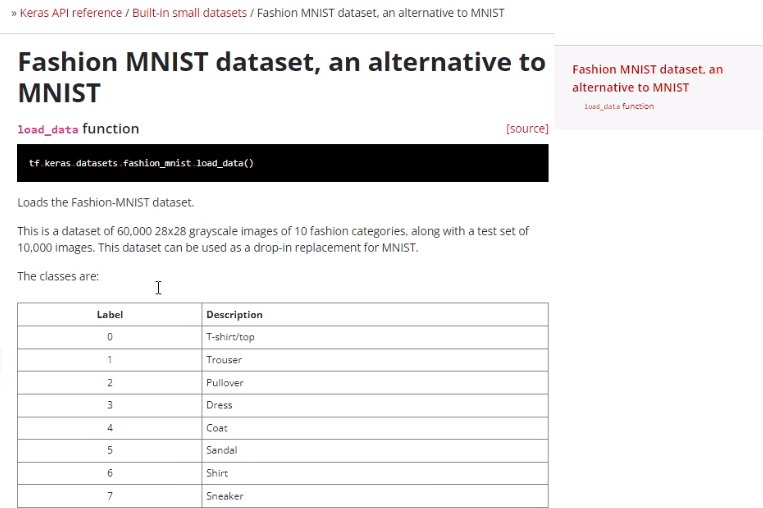

Podemos encontrar la documentación de Keras para utilizar éste dataset en la siguiente liga:

https://keras.io/api/datasets/fashion_mnist/

In [1]:
import tensorflow as tf 

In [2]:
print(tf.__version__)

2.11.0


In [3]:
# cargamos los datos como nos dice la documentación y verificamos que se obtuvieron de manera correcta con algunos test de dimesiones de los arreglos

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

4422102/4422102 [==============================] - 1s 0us/step


Se necesita también de un arreglo para los labels:

Label	Description
- 0	    T-shirt/top
- 1	    Trouser
- 2	    Pullover
- 3	    Dress
- 4	    Coat
- 5	    Sandal
- 6	    Shirt
- 7	    Sneaker
- 8	    Bag
- 9	    Ankle boot

In [4]:
class_name = ['Polo', 'Pantalon', 'Pull-over', 'Vestido', 'Abrigo', 'Sandalias', 'Camisa', 'Zapatillas', 'Bolso', 'Botines']


In [15]:
print(y_train[1]) # Label 0
print('\n')
print(x_train[0]) # Valor, se trata de un array de arrays, 28 arrays con 28 elementos cada uno, ya que cada elemento es el valor de un pixel
# Las imágnes se tratan de una sola matriz cada una y no tres, ya que se está trabajando en escala de grises y no RGB
# Van de 0 a 255 (blanco a negro)


0


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 23

In [16]:
import matplotlib.pyplot as plt 
import random 

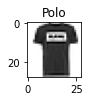

In [22]:
plt.figure(figsize=(1,1)) # Cambiando la figura al tamaño mínimo ya que la imagen a mostrar es pequeña y para que no se vea tan pixelada
plt.imshow(x_train[1], cmap=plt.cm.binary) # Se cambió a una escala de grises cmap binaria
plt.title(class_name[y_train[1]]) # Como se había comentado, en el index 1 se encuentra el primer label 
#plt.axis(False) Para ver las dimensiones de la imagen 28x28
plt.show()

La idea es crear una inteligencia artificial que tenga el mismo conocimiento que nosotros sobre, por ejemplo, un polo, y de esa forma pueda detectar cualquier polo y clasificarlo como un polo

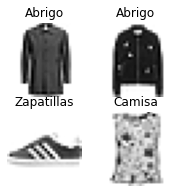

In [29]:
plt.figure(figsize=(3, 3))
for i in range(4):
    ax = plt.subplot(2, 2, i + 1) # En dos filar y dos columnas mostrar cada una de las 4 imágenes
    index = random.choice(range(len(x_train))) # Cualquier imagen random de mis datos de entrenamiento
    plt.imshow(x_train[index], cmap=plt.cm.binary) # Se cambió a una escala de grises cmap binaria
    plt.title(class_name[y_train[index]]) # Como se había comentado, en el index 1 se encuentra el primer label 
    plt.axis(False)
plt.show()
    

Un experimento interesante se realizó con ésta base de datos, en el que se utilizaron diferentes aproximaciónes de deep learning para clasificar las prendas, y resultó que casi cualquiera de éstas aproximaciónes de machine learning tenía una precisión mejor que cuando dejaron a un grupo de personas clasificar las prendas viendo las imágenes del dataset.

Una inteligencia artificial tiene la capacidad de realizar mejor las tareas que cualquier persona que no sea un experto.

## Preprocesamiento


In [31]:
# Pasaremos la escala a 0 y 1 ya que sabemos que los colores de los pixeles en una imagen tienen valores entre 0 y 255

X_train = x_train / 255.0
X_test = x_test / 255.0


In [32]:
# Ahora se hará uso de la data de validación para que después de cada época que obtiene esos datos en base a los datos de entrenamiento, va
# a validar los datos en base a esos datos de validación, y de lo obtenido se hará un forward, va a regresar ese resultado a todas las neuronas
# para que tengan ese input y puedan hacer nuevos cálculos, es decir, en base a ese error de la validación recalcular los pesos y volver a
# entrenar el modelo con los datos de prueba

# Vamos a utilizar el X_train para obtener los datos de entrenamiento y validación, dado que ya tenemos los de prueba

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.16,
                                                  stratify=y_train,
                                                  random_state=0) # Stratify para dividir la porción de datos en la misma proporción de etiquetas
                                                                  #  que tiene el ejemplo

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)





(50400, 28, 28) (9600, 28, 28) (50400,) (9600,)


## Entrenamiento

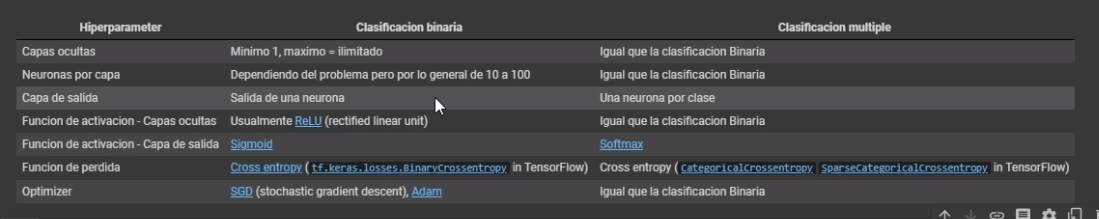

In [33]:
# Científicos ya han probado ciertos modelos con super computadoras y han obtenido siempre los mejores resultados con éstos valores
# por lo que pueden ser usados como una guía 

# Dado que estamos relizando una clasificación múltiple, vamos a tener una neurona por cada clase en la capa de salida
# La función de activación más recomendada para clasificación múltiple es también ReLu
# La funcón de activación para la capa de salida mejor es Softmax
# La función de pérdida para éste ejemplo será SparseCategoricalCrossentropy pues los datos no se han codificado con la función OneHotEncoder, solo se dividión entre 255

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), # Para aplanar (hacer array) la imágen dado que se trata de una matriz (2 dimensiones) 
    tf.keras.layers.Dense(100, activation = 'relu'), # 100 neuronas en la capa con función de activación ReLu
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(len(class_name), activation = 'softmax') # En la capa de salida ponemos tantas neuronas como clases haya 
]) 

model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [34]:
model_1_history = model_1.fit(X_train, y_train,
                              epochs=10,
                              validation_data=(X_val, y_val)) # Cada época se envían datos de validación (como si fueran de test pero para cada época)
                            


Epoch 1/10
1575/1575 [==============================] - 23s 8ms/step - loss: 0.5101 - accuracy: 0.8188 - val_loss: 0.3830 - val_accuracy: 0.8601
Epoch 2/10
1575/1575 [==============================] - 13s 8ms/step - loss: 0.3759 - accuracy: 0.8635 - val_loss: 0.3984 - val_accuracy: 0.8506
Epoch 3/10
1575/1575 [==============================] - 13s 9ms/step - loss: 0.3403 - accuracy: 0.8751 - val_loss: 0.3488 - val_accuracy: 0.8719
Epoch 4/10
1575/1575 [==============================] - 13s 9ms/step - loss: 0.3162 - accuracy: 0.8844 - val_loss: 0.3103 - val_accuracy: 0.8872
Epoch 5/10
1575/1575 [==============================] - 13s 8ms/step - loss: 0.2984 - accuracy: 0.8899 - val_loss: 0.3346 - val_accuracy: 0.8793
Epoch 6/10
1575/1575 [==============================] - 12s 7ms/step - loss: 0.2833 - accuracy: 0.8950 - val_loss: 0.3445 - val_accuracy: 0.8793
Epoch 7/10
1575/1575 [==============================] - 12s 8ms/step - loss: 0.2740 - accuracy: 0.8977 - val_loss: 0.3093 - val_ac

In [35]:
import pandas as pd 

<AxesSubplot:>

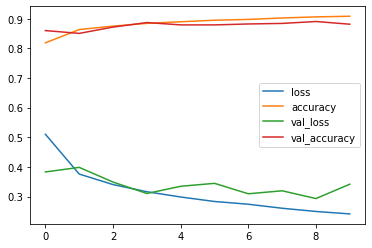

In [37]:
pd.DataFrame(model_1_history.history).plot()

## Buscando el mejor learning rate


In [38]:
import numpy as np 

In [42]:
EPOCH = 40 # En cada época se está calculando el learnig rate, para encontrar el mejor en cada época será necesario enviar un learning rate 
# distinto para ver si mejora la función de pérdida y mejora el accuracy, en éste caso nos fijaremos en la función de pérdida.

# Los entrenamientos con tensorflow permiten enviar o insertar un callback que yo podría hacer cusstomizaciones o insertar instrucciones de
# de código en cada época.

# Primero crearemos diferentes valores de learning rate y luego se creará un callback para insertar esos learnig rate en cada época.

# Como tenemos cuarenta épocas, tomaremos 40 learning rates al azar
# 

numeros_aleatorios = np.arange(EPOCH) / 20 # Dividimos para que no nos queden muchos números enteros (va del 1 al 40)
numeros_aleatorios 

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95])

In [43]:
lrs = 1e-3*10**numeros_aleatorios # Fórmula para obtener 40 números pequeños aleatorios de learning rate
lrs

array([0.001     , 0.00112202, 0.00125893, 0.00141254, 0.00158489,
       0.00177828, 0.00199526, 0.00223872, 0.00251189, 0.00281838,
       0.00316228, 0.00354813, 0.00398107, 0.00446684, 0.00501187,
       0.00562341, 0.00630957, 0.00707946, 0.00794328, 0.00891251,
       0.01      , 0.01122018, 0.01258925, 0.01412538, 0.01584893,
       0.01778279, 0.01995262, 0.02238721, 0.02511886, 0.02818383,
       0.03162278, 0.03548134, 0.03981072, 0.04466836, 0.05011872,
       0.05623413, 0.06309573, 0.07079458, 0.07943282, 0.08912509])

In [45]:
# Esos learning rate se tienen que enviar en cada época
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), # Para aplanar (hacer array) la imágen dado que se trata de una matriz (2 dimensiones) 
    tf.keras.layers.Dense(100, activation = 'relu'), # 100 neuronas en la capa con función de activación ReLu
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(len(class_name), activation = 'softmax') # En la capa de salida ponemos tantas neuronas como clases haya 
]) 

model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [46]:
def scheduler(epoch, lr):
    return lrs[epoch]

lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

model_2_history = model_1.fit(X_train, y_train,
                              epochs=EPOCH,
                              validation_data=(X_val, y_val),
                              callbacks=[lr_callback]) # Ahora se agrega el envío de Callbacks
                            


Epoch 1/40
1575/1575 [==============================] - 17s 10ms/step - loss: 0.2306 - accuracy: 0.9117 - val_loss: 0.3117 - val_accuracy: 0.8908 - lr: 0.0010
Epoch 2/40
1575/1575 [==============================] - 21s 13ms/step - loss: 0.2311 - accuracy: 0.9105 - val_loss: 0.3412 - val_accuracy: 0.8797 - lr: 0.0011
Epoch 3/40
1575/1575 [==============================] - 19s 12ms/step - loss: 0.2325 - accuracy: 0.9112 - val_loss: 0.3564 - val_accuracy: 0.8780 - lr: 0.0013
Epoch 4/40
1575/1575 [==============================] - 23s 15ms/step - loss: 0.2327 - accuracy: 0.9122 - val_loss: 0.3294 - val_accuracy: 0.8890 - lr: 0.0014
Epoch 5/40
1575/1575 [==============================] - 12s 7ms/step - loss: 0.2365 - accuracy: 0.9092 - val_loss: 0.3395 - val_accuracy: 0.8850 - lr: 0.0016
Epoch 6/40
1575/1575 [==============================] - 8s 5ms/step - loss: 0.2430 - accuracy: 0.9080 - val_loss: 0.3357 - val_accuracy: 0.8874 - lr: 0.0018
Epoch 7/40
1575/1575 [===========================

Text(0, 0.5, 'Loss Function')

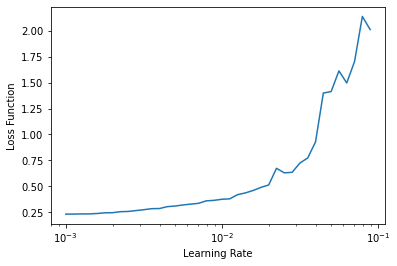

In [47]:
# Cuando crece el learning rate, disminuye el accuracy y aumenta la función de pérdida

# Para encontrar el mejor learning rate vamos a plotear cambiando la distribución del eje x a una escala logarítmica (algo pequeño),

plt.semilogx(lrs, model_2_history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss Function') 

In [ ]:
# Para elegir el learning rate ideal observando la curva tenemos que hubicar el punto más bajo e ir un paso atrás en el eje 
# de las x en ese punto y aquí vemos que es 10**-3

# Una vez hubicada la época con los mejores pesos (logs del entrenamiento) toca guardarla, para lo que usaremos otro callback 
# para obtener los mejores pesos 